In [1]:
import sys
sys.path.append('f:/seismic/code/core')
sys.path.append('/seismic/code/core')
sys.path.append('/kaggle/input/my-seis-library/')
import kaggle_support as kgs
import importlib
import numpy as np
import matplotlib.pyplot as plt
import glob
import copy
import os
import seis_test
import seis_invert
import seis_prior
#import seis_nn
import cupy as cp
import seis_diagnostics
import seis_forward
import seis_forward2

/seismic/models/brendan/*.pth
Loading:  /seismic/models/brendan/unet2d_caformer_seed3_epochbest.pt
n_models: 1


In [2]:
data=kgs.load_all_train_data()
#d = data[11]
#print(d.family)

In [3]:
# importlib.reload(seis_prior)
# importlib.reload(seis_diagnostics)
# importlib.reload(seis_invert)
# kgs.profiling=False
# kgs.debugging_mode = 0
# seis_forward2.profiling=False
# seis_forward2.reset_profile()

# model = seis_invert.InversionModel()
# model.state = 1
# model.method = 'L-BFGS-B'
# model.maxiter = 5000
# model.prior = seis_prior.SquaredExponential()


# model.prior.basis_functions();
# w = cp.linalg.eigvalsh(model.prior.P)   
# plt.figure()
# plt.semilogy(cp.asnumpy(cp.abs(w)))

capturing graph


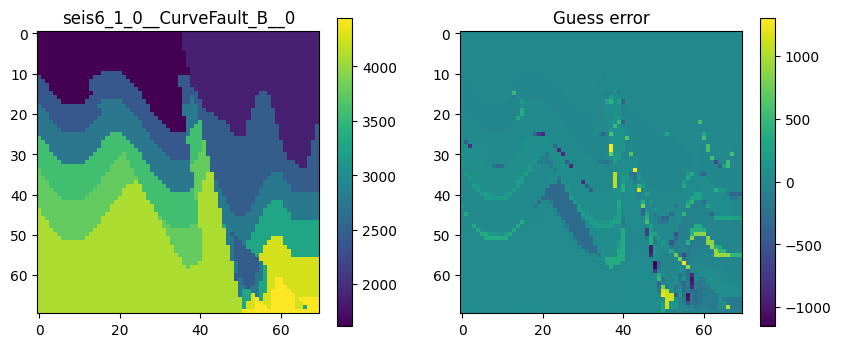

diag 3.250623900849397e-05
capturing graph


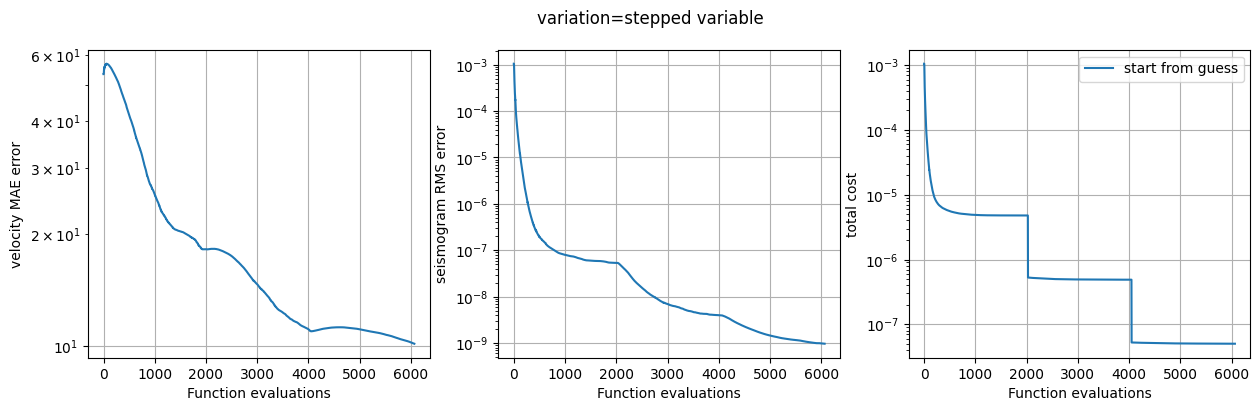

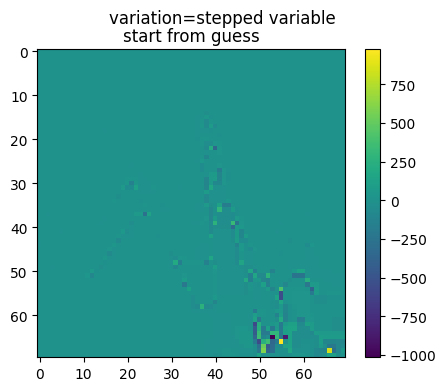

100%|██████████| 1/1 [00:00<00:00,  1.79it/s]


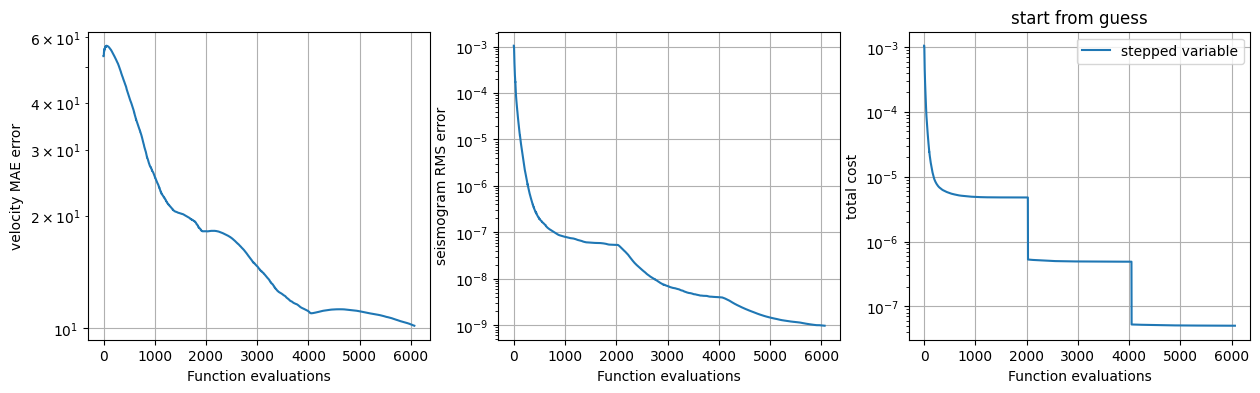

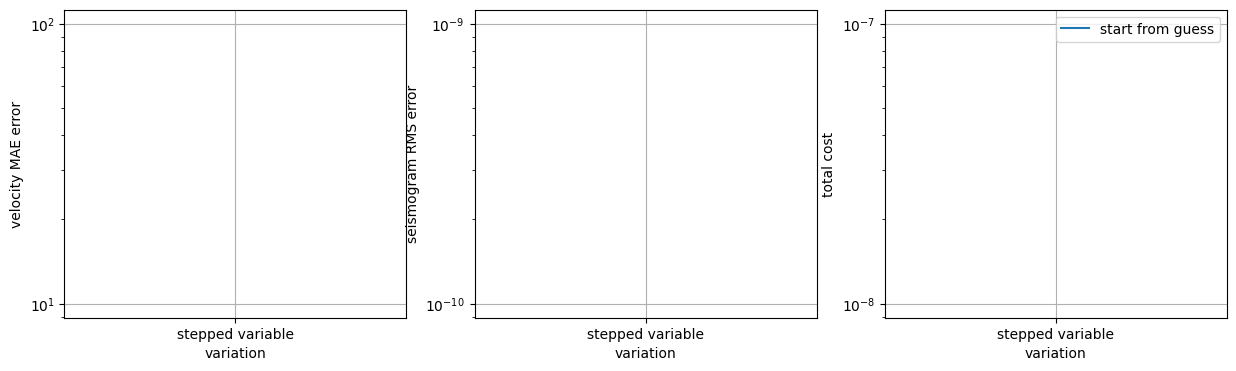

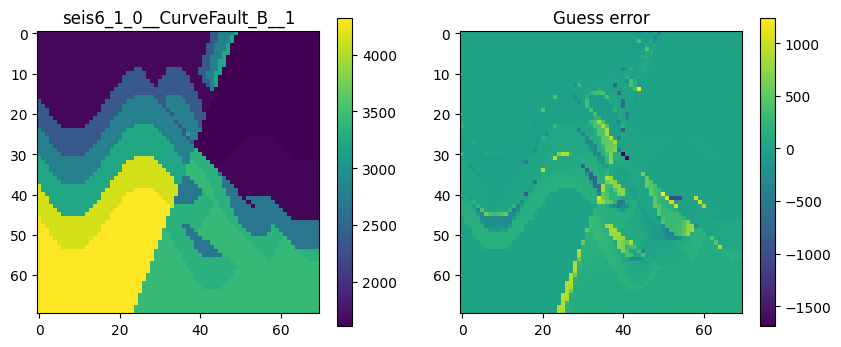

diag 4.576705036178085e-05


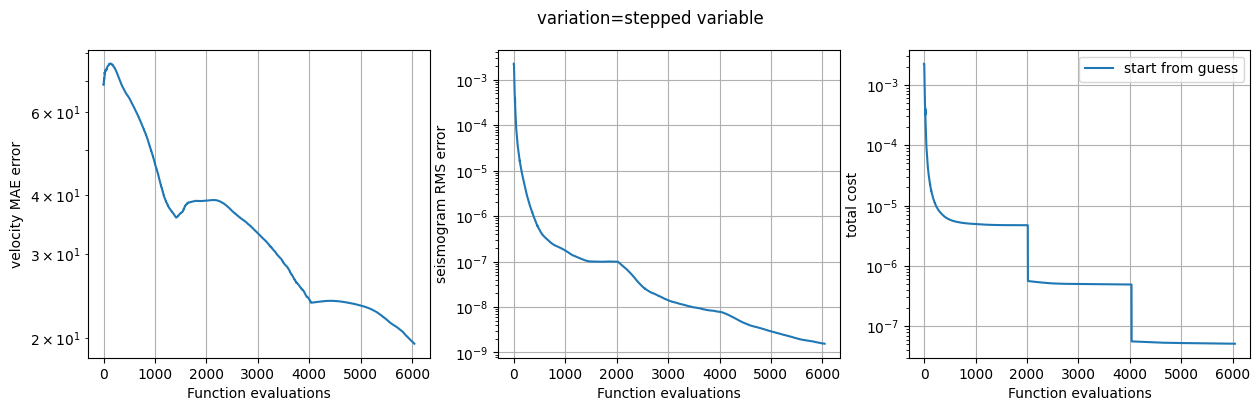

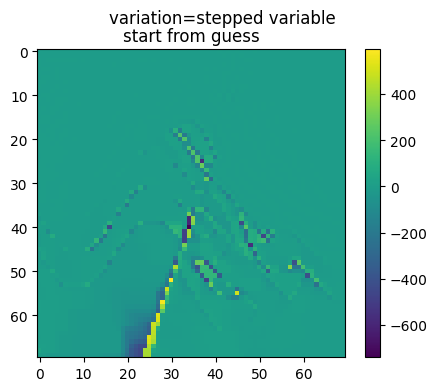

100%|██████████| 1/1 [00:00<00:00, 10.40it/s]


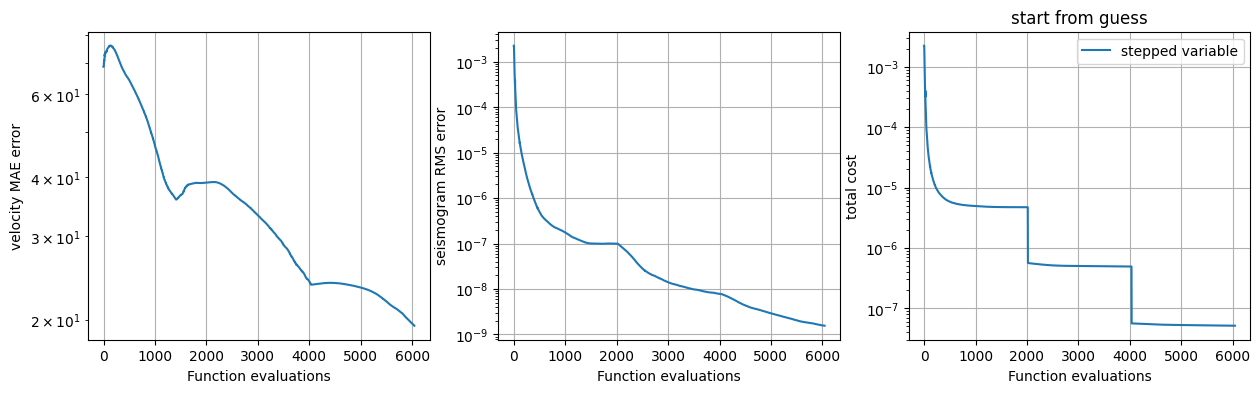

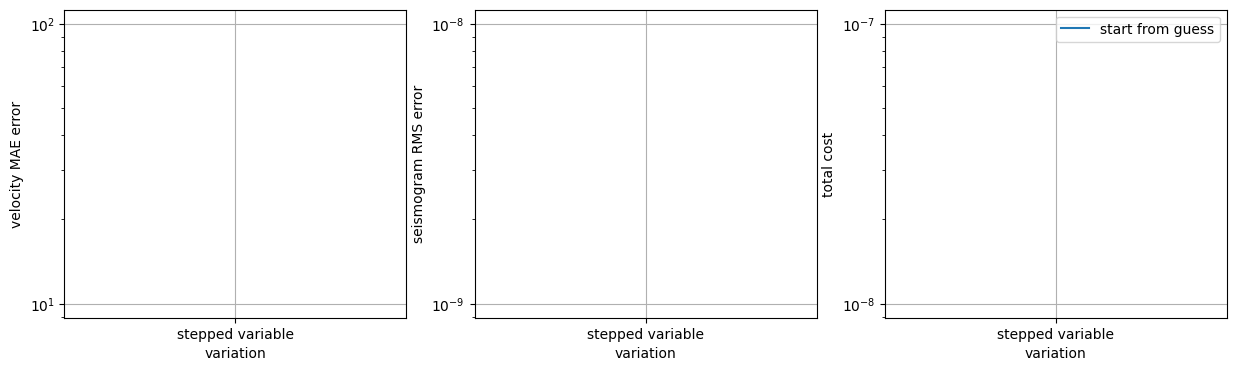

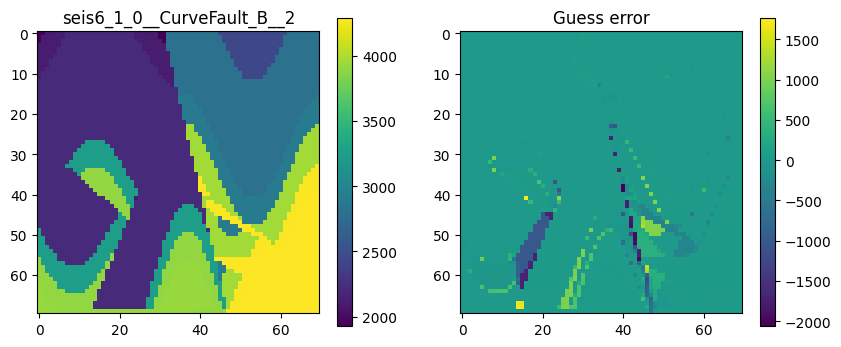

diag 3.7414936137285974e-05


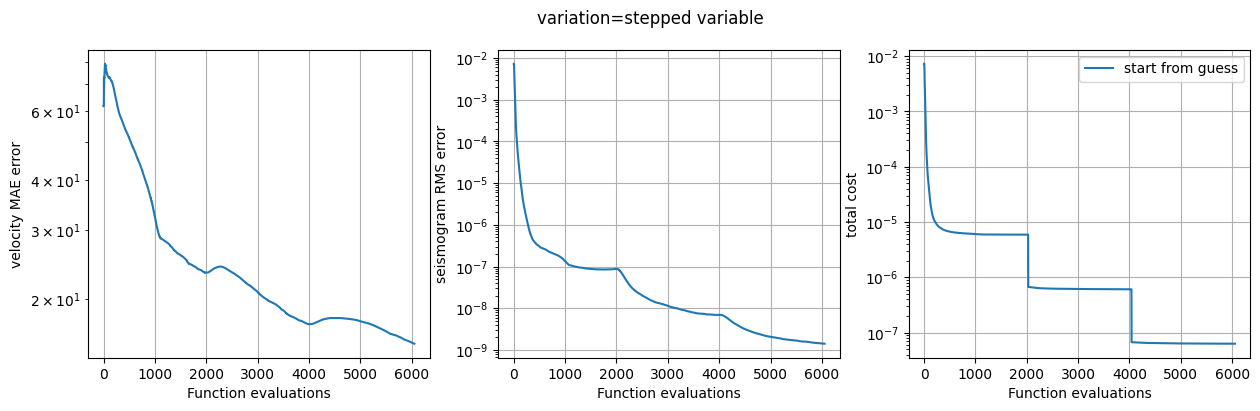

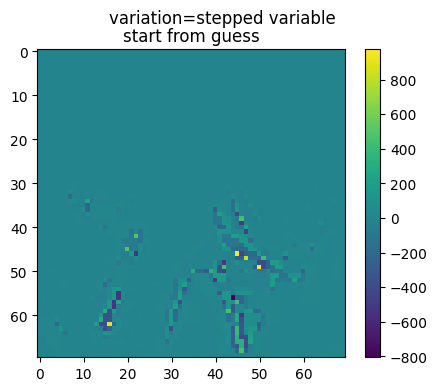

100%|██████████| 1/1 [00:00<00:00,  7.79it/s]


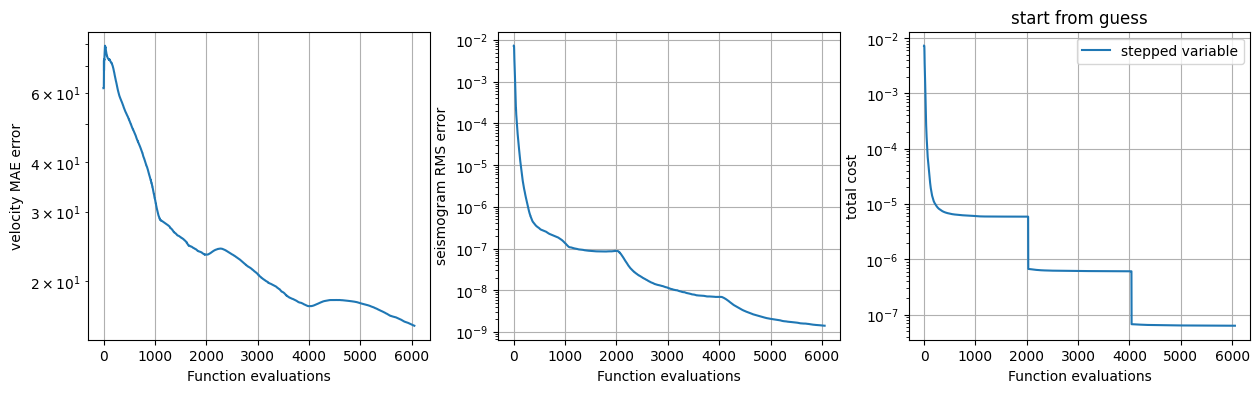

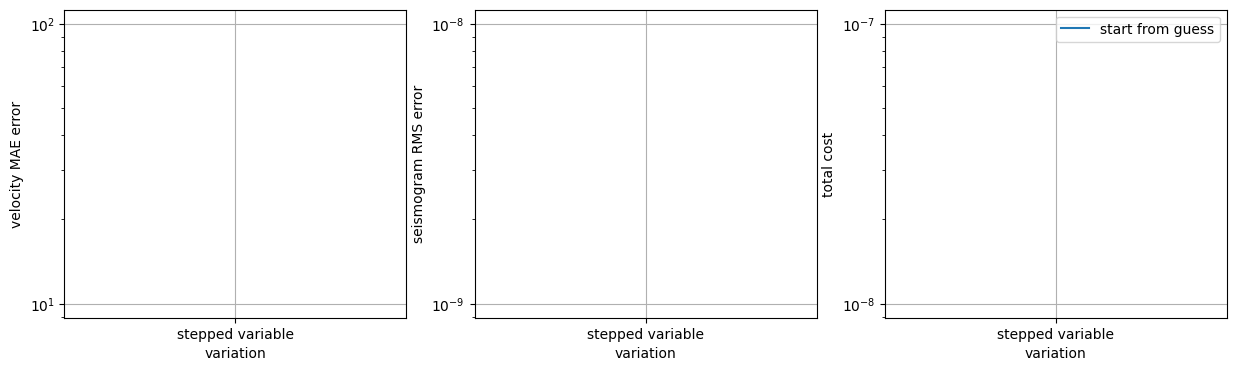

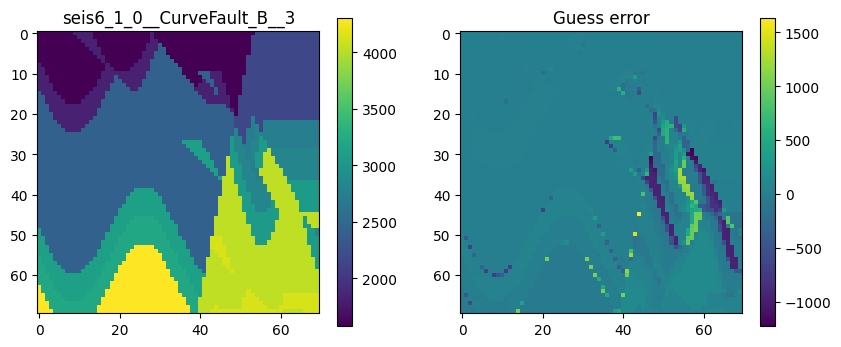

diag 3.229498101261271e-05


In [ ]:
importlib.reload(seis_prior)
importlib.reload(seis_diagnostics)
importlib.reload(seis_invert)
importlib.reload(seis_forward)
kgs.profiling=False
seis_invert.profiling=False
kgs.debugging_mode = 0
seis_forward2.profiling=False
seis_forward2.reset_profile()

# transform back on, history size to infinite, maxiter down
model = seis_invert.InversionModel()
model.history_size = 10000
model.prior = seis_prior.TotalVariation()
model.prior.λ = 10**-8
model.show_convergence=True
model.iter_list = [1000]

do_which_list = [False,False,True]

def param_func(model,value):
    match value:
        case 'stepped variable':
            model.iter_list = [2000,2000,2000]
            model.lambda_list = [1e-7,1e-8,1e-9]
        case _:
            raise 'stop'
    #model.iter_list = [ii//100 for ii in model.iter_list]
    return model
    
param_values = ['stepped variable']
param_name = "variation"


for d in data[1000:]:
    results = seis_diagnostics.do_diagnostics_run(d, model, do_which_list, param_func, param_values, param_name, help_fac=0.)